# 특성 공학 `Feature Engineering`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('./perch.csv')
perch_data = df.to_numpy()

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(perch_data, perch_weight, random_state=42)
# X_train # 참고로 얘는 array

In [3]:
# 1.단 선형회귀를 돌려봐.
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))
print(lr.score(X_train, y_train))

# 0.8796419177546368
# 0.9559326821885706


0.8796419177546368
0.9559326821885706


In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2, 3, 5]])
poly.transform([[2, 3, 5]]) # 얘는 변환. 
# 2, 3, 5에 대한 소인수곱이네~(제곱까지)
# 웃기는 건 fit이 하는 일이 없는데도, fit을 해야 transform을 할 수 있음.
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
X_train_poly.shape, poly.get_feature_names_out()
X_test_poly.shape, poly.get_feature_names_out()

((14, 10),
 array(['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
        'x2^2'], dtype=object))

In [5]:
lr_p = LinearRegression()
lr.fit(X_train_poly, y_train)

print(lr.score(X_train_poly, y_train))
print(lr.score(X_test_poly, y_test))

print(lr.coef_, lr.intercept_)

0.9903183436982125
0.9714559911594137
[   0.           34.80604039  -88.68430232 -184.11606694   -2.2696004
    8.74890226    9.41670602   27.76120631 -119.89306061   93.68198334] 124.06521772229036


In [6]:
poly=PolynomialFeatures(degree=5, include_bias=False)
X_train_p5 = poly.fit_transform(X_train)
X_test_p5 = poly.fit_transform(X_test)
X_train_p5.shape

lr.fit(X_train_p5, y_train)
lr.score(X_train_p5, y_train)
# 온몸 비틀기로 달성해낸 성과: 0.9999999999997811
lr.score(X_test_p5, y_test) 
# suuuuuuuuuuper Overfitting: -144.4051193329733

-144.4051193329733

# 규제 `Regularization`
> 과대적합(Overfitting) 방지를 위해 규제를 하게 됨.
- 릿지(ridge) 회귀 : 계수를 제곱한 값을 기준으로 규제
- 랏쏘(lasso) 회귀 : 절댓값 기주으로 규제

In [7]:
from sklearn.preprocessing import StandardScaler
# StandardScaler: 스탠다드한 스케일링을 해주는 친구
ss = StandardScaler()
# test는 train의 평균으로 계산하면 안 된다고~
ss.fit(X_train_p5)
X_train_scaled = ss.transform(X_train_p5)
X_test_scaled = ss.transform(X_test_p5) 

In [8]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1) # 인스턴스 생성 # alpha는 뭘까? 하이퍼파라미터.
ridge.fit(X_train_scaled, y_train)
print(ridge.score(X_train_scaled, y_train))
print(ridge.score(X_test_scaled, y_test)) # 0.979069397761538. 이제 잘 됨.

0.9903815817570365
0.9827976465386943


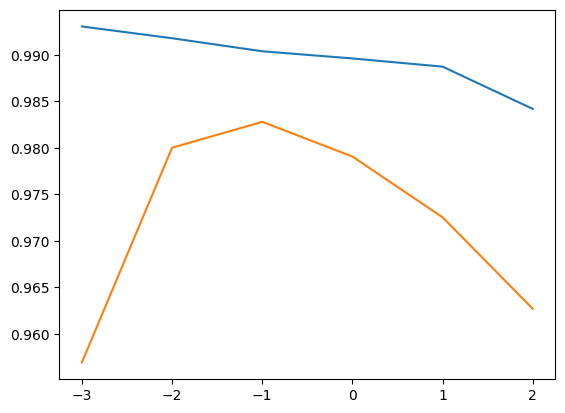

In [9]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    s1 = ridge.score(X_train_scaled, y_train)
    s2 = ridge.score(X_test_scaled, y_test)
    train_score.append(s1)
    test_score.append(s2)

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
# 0.1일 때, test_score가 가장 좋게 나타남.
# 사실 0.05가 더 좋은 건 안 비밀.

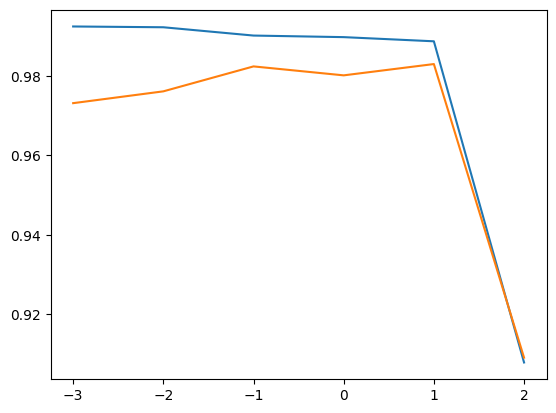

In [10]:
from sklearn.linear_model import Lasso


train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter = 10000)
    lasso.fit(X_train_scaled, y_train)
    s1 = lasso.score(X_train_scaled, y_train)
    s2 = lasso.score(X_test_scaled, y_test)
    train_score.append(s1)
    test_score.append(s2)

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
# 0.1일 때, test_score가 가장 좋게 나타남.
# 사실 0.05가 더 좋은 건 안 비밀.

In [11]:
lasso = Lasso(alpha=10, max_iter=10000)
lasso.fit(X_train_scaled, y_train)

s1 = lasso.score(X_train_scaled, y_train)
s2 = lasso.score(X_test_scaled, y_test)
print(s1, s2)

X = poly.transform([[13.7, 3.53, 2]])
X = ss.transform(X)
lasso.predict(X) # 실제는 32

0.9887624603020235 0.9830309645308444


array([31.53335736])